<a href="https://colab.research.google.com/github/julianthr/ML_Assignments/blob/main/Final_Project/Music/CNNs_single_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Package Imports and Data Load

In [ ]:
!pip install tensorflow
!pip install scikit-learn
import tensorflow
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Reshape, Permute, GRU
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras import regularizers
from keras.utils import set_random_seed
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [ ]:
# load train, validation and test data in UCloud

X_train = np.load('X_train.npy')
X_val = np.load('X_val.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')

# load data in Colab
"""
from google.colab import drive

# mount to Google Drive 
drive.mount("/content/drive")

# save the most common part of file path
root_path = "/content/drive/My Drive/Audio_Mood_Classification"

file_names = ['X_train_mfcc30s.npy',
              'X_val_mfcc30s.npy',
              'X_test_mfcc30s.npy',
              'y_train_mfcc30s.npy',
              'y_val_mfcc30s.npy',
              'y_test_mfcc30s.npy']

folder = "train_test_data/mfcc30s"

for name in file_names:
    file_path = os.path.join(root_path, folder, name)
    var_name = name.split('.')[0]
    globals()[var_name] = np.load(file_path)
"""

'\nfrom google.colab import drive\n\n# mount to Google Drive \ndrive.mount("/content/drive")\n\n# save the most common part of file path\nroot_path = "/content/drive/My Drive/Audio_Mood_Classification"\n\nfile_names = [\'X_train_mfcc30s.npy\',\n              \'X_val_mfcc30s.npy\',\n              \'X_test_mfcc30s.npy\',\n              \'y_train_mfcc30s.npy\',\n              \'y_val_mfcc30s.npy\',\n              \'y_test_mfcc30s.npy\']\n\nfolder = "train_test_data/mfcc30s"\n\nfor name in file_names:\n    file_path = os.path.join(root_path, folder, name)\n    var_name = name.split(\'.\')[0]\n    globals()[var_name] = np.load(file_path)\n'

In [ ]:
print('X_train: \n' + str(X_train.shape) + '\n')
print('X_val: \n' + str(X_val.shape) + '\n')
print('X_test: \n' + str(X_test.shape) + '\n')
print('y_train: \n' + str(y_train.shape) + '\n')
print('y_val: \n' + str(y_val.shape) + '\n')
print('y_test: \n' + str(y_test.shape) + '\n')

X_train: 
(4339, 1292, 20, 1)

X_val: 
(1131, 1292, 20, 1)

X_test: 
(1131, 1292, 20, 1)

y_train: 
(4339, 10)

y_val: 
(1131, 10)

y_test: 
(1131, 10)



### Configuration and Function Definitions

In [ ]:
# define input shape and optimizer for all CNNs, build uniform compiler and fit functions
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

optimizer = keras.optimizers.Adam(learning_rate= 0.001)

epochs = 30

# set seed
keras.utils.set_random_seed(17)

# define functions that are used for training and evaluation of all CNNs
def compiler(cnn, optimizer=optimizer):
  cnn.compile(optimizer=optimizer,
             loss = keras.losses.categorical_crossentropy,
             metrics = [keras.metrics.AUC(name="auc"),
                        keras.metrics.Precision(name="precision"),
                        keras.metrics.Recall(name="recall")])

def fit_model(cnn):
  history = cnn.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    batch_size=32, epochs = epochs)
  return history

def plot_training(history):
  # retrieve time series from history
  auc = history.history['auc']
  val_auc = history.history['val_auc']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(epochs)

  # Plot the figure for Training and Validation Accuracy
  plt.plot(epochs_range, auc, label='Training AUC')
  plt.plot(epochs_range, val_auc, label='Validation AUC')
  plt.legend(loc='lower right')
  plt.title('Training and Validation AUC')
  plt.show()

  # Plot the figure for Training and Validation Loss
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

def get_validation_metrics(history):
  val_auc = history.history['val_auc']
  val_precision = history.history['val_precision']
  val_recall = history.history['val_recall']
  return val_auc, val_precision, val_recall

### CNN1

In [1]:
# CNN 1: Shallow CNN
cnn1 = keras.models.Sequential([
    # 1st conv layer
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = input_shape, activity_regularizer=regularizers.L2(5e-4)),
    keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 2nd conv layer
    keras.layers.Conv2D(64, (3, 3), activation='relu',  activity_regularizer=regularizers.L2(5e-4)),
    keras.layers.MaxPool2D((2, 2), strides=(3, 2), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # flatten
    keras.layers.Flatten(),

    # fully connected layer
    keras.layers.Dense(128, activation='relu',  activity_regularizer=regularizers.L2(5e-4)),
    keras.layers.Dropout(0.5),
    
    # output layer
    keras.layers.Dense(10, activation = 'softmax', name='output')
])

NameError: ignored

In [ ]:
# compile model
compiler(cnn1)

# train model
cnn1_history = fit_model(cnn1)

Epoch 1/30
136/136 [==============================] - 24s 169ms/step - loss: 3.6901 - auc: 0.5651 - precision: 0.1206 - recall: 0.0071 - val_loss: 2.3658 - val_auc: 0.5572 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
136/136 [==============================] - 22s 161ms/step - loss: 2.2559 - auc: 0.6051 - precision: 0.2105 - recall: 9.2187e-04 - val_loss: 2.2118 - val_auc: 0.6368 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
136/136 [==============================] - 22s 159ms/step - loss: 2.2501 - auc: 0.6049 - precision: 0.4500 - recall: 0.0021 - val_loss: 2.1721 - val_auc: 0.6889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
136/136 [==============================] - 22s 161ms/step - loss: 2.2317 - auc: 0.6174 - precision: 0.5429 - recall: 0.0044 - val_loss: 2.2091 - val_auc: 0.6967 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
136/136 [==============================] - 22s 162ms/step - loss: 2.2179 - auc: 0.625

In [ ]:
print("input shape: " + str(input_shape))
cnn1.summary()

input shape: (1292, 20, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1290, 18, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 645, 9, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 645, 9, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 645, 9, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 643, 7, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin

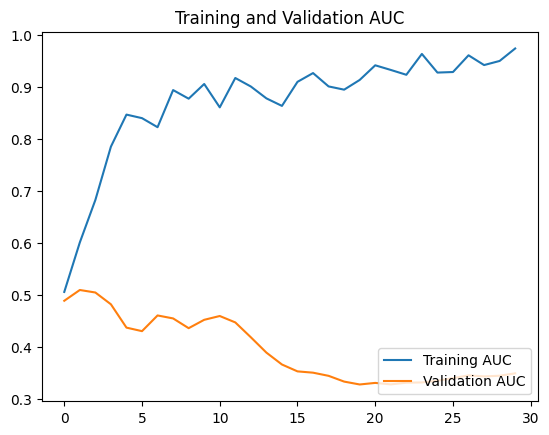

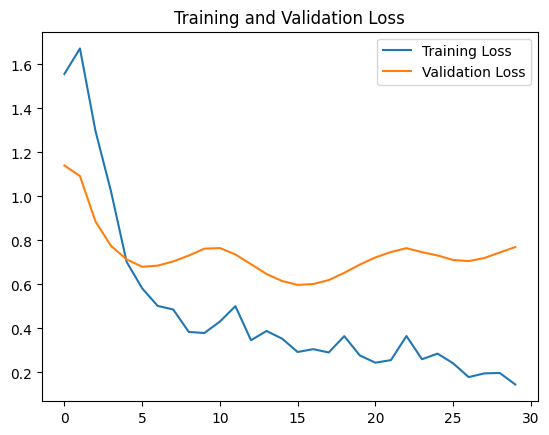

In [ ]:
# plot training
plot_training(cnn1_history)

In [2]:
# compute final training evaluation metrics
cnn1_evaluation = cnn1.evaluate(x = X_val, y= y_val)

NameError: ignored

In [ ]:
y_val_pred = cnn1.predict(x = X_val)

In [ ]:
result = confusion_matrix(y_val, y_val_pred)

In [ ]:
report = classification_report(
        y_val,
        y_val_pred,
        output_dict=False,
        target_names=['inspiring', 'energetic', 'happy', 'sad', 'motivational', 'relaxing', 'uplifting', 'calm', 'love','hopeful'],
        )

### CNN2

In [ ]:
# CNN 2: deep CNN inspired by Yi et al 2020
cnn2 = keras.models.Sequential([
    # 1st conv layer
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", input_shape = input_shape),
    keras.layers.MaxPool2D((2,2), strides=(2,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 2nd conv layer
    keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"), 
    keras.layers.MaxPool2D((2,2), strides=(2,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 3rd conv layer
    keras.layers.Conv2D(128, kernel_size=3,  activation="relu", padding="same"),
    keras.layers.MaxPool2D((2,2), strides=(2,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 4th conv layer
    keras.layers.Conv2D(256, kernel_size=3, activation="relu", padding="same"),
    keras.layers.MaxPool2D((2,2), strides=(2,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 5th conv layer
    keras.layers.Conv2D(512, kernel_size=3, activation="relu", padding="same"),
    keras.layers.MaxPool2D((2,2), strides=(2,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 6th conv layer
    keras.layers.Conv2D(256, kernel_size=3, activation="relu", padding="same"),
    keras.layers.MaxPool2D((2,2), strides=(2,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # Flatten
    keras.layers.Flatten(),
    
    # Dense Layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    # Output layer
    keras.layers.Dense(10, activation ='softmax', name='output')

])

In [ ]:
# compile model
compiler(cnn2, optimizer=keras.optimizers.legacy.Adam(learning_rate= 0.001))

# train model
cnn2_history = fit_model(cnn2)

Epoch 1/30
2/2 [==============================] - 14s 4s/step - loss: 0.9599 - auc: 0.4554 - precision: 0.1070 - recall: 0.3448 - val_loss: 0.6434 - val_auc: 0.6046 - val_precision: 0.3750 - val_recall: 0.3000
Epoch 2/30
2/2 [==============================] - 11s 4s/step - loss: 0.6856 - auc: 0.6195 - precision: 0.1771 - recall: 0.2931 - val_loss: 0.5846 - val_auc: 0.6323 - val_precision: 0.0625 - val_recall: 0.0500
Epoch 3/30
2/2 [==============================] - 15s 4s/step - loss: 0.4524 - auc: 0.7475 - precision: 0.2281 - recall: 0.2241 - val_loss: 0.5085 - val_auc: 0.5289 - val_precision: 0.1250 - val_recall: 0.1000
Epoch 4/30
2/2 [==============================] - 15s 5s/step - loss: 0.3911 - auc: 0.8151 - precision: 0.4565 - recall: 0.3621 - val_loss: 0.4851 - val_auc: 0.5209 - val_precision: 0.1250 - val_recall: 0.1000
Epoch 5/30
2/2 [==============================] - 12s 4s/step - loss: 0.3960 - auc: 0.8215 - precision: 0.4500 - recall: 0.3103 - val_loss: 0.4969 - val_auc: 0.

In [ ]:
print("input shape: " + str(input_shape))
cnn2.summary()

input shape: (1292, 20, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 1292, 20, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 646, 19, 32)      0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 646, 19, 32)      128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 646, 19, 32)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 644, 17, 64)       18496     
                                                                 
 max_pooling2d_5 (MaxPoolin

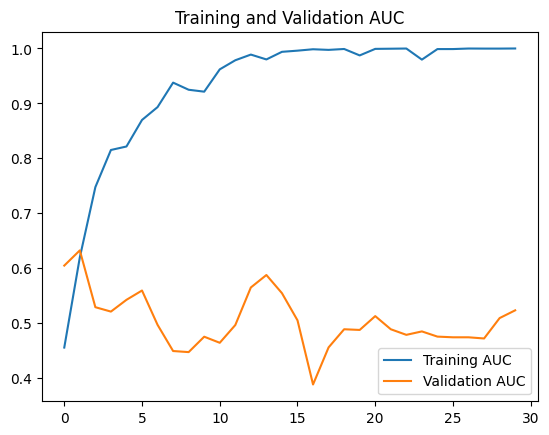

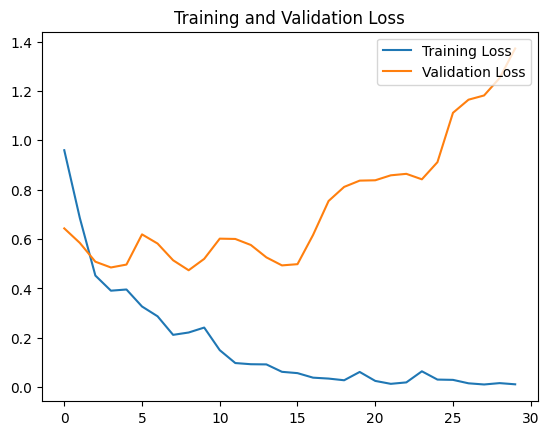

In [ ]:
# plot training
plot_training(cnn2_history)

In [ ]:
# compute final training evaluation metrics
cnn2_evaluation = cnn2.evaluate(x = X_val, y= y_val)

1/1 [==============================] - 1s 834ms/step - loss: 1.3719 - auc: 0.5232 - precision: 0.0000e+00 - recall: 0.0000e+00


### CNN3

In [ ]:
# CNN 3 (FCN-4): FCN structure inspired by Choi et al. 2016
# input shape in paper: (96x1366x1)
# our input shape: (1292x40x1)

cnn3 = keras.models.Sequential([
    
    # 1st conv layer
    keras.layers.Conv2D(128, kernel_size=3, strides=(2,1), padding="same", activation="relu", input_shape=input_shape),
    keras.layers.MaxPool2D((4,1), strides=(2,2), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 2nd conv layer
    keras.layers.Conv2D(384, kernel_size=3, strides = (2,1), activation="relu"),
    keras.layers.MaxPool2D((5,2), strides=(2,2), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 3rd conv layer
    keras.layers.Conv2D(768, kernel_size=(3,1), strides = (2,1), activation="relu"),
    keras.layers.MaxPool2D((6,2), strides=(2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 4th conv layer
    keras.layers.Conv2D(2024, kernel_size=(3,2), strides = (2,1), activation="relu"),
    keras.layers.MaxPool2D((7,1), strides=(2,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # Flatten (only necessary for dimensionality of output)
    keras.layers.Flatten(),

    # Output layer
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation ='softmax', name='output')


In [ ]:
# compile model
compiler(cnn3, keras.optimizers.legacy.Adam(learning_rate= 0.001))

# train model
cnn3_history = fit_model(cnn3)

Epoch 1/30
2/2 [==============================] - 7s 2s/step - loss: 1.1072 - auc: 0.5056 - precision: 0.1310 - recall: 0.5172 - val_loss: 0.6889 - val_auc: 0.3555 - val_precision: 0.1167 - val_recall: 0.3500
Epoch 2/30
2/2 [==============================] - 6s 3s/step - loss: 1.0933 - auc: 0.6859 - precision: 0.1787 - recall: 0.7241 - val_loss: 0.6816 - val_auc: 0.4787 - val_precision: 0.1406 - val_recall: 0.4500
Epoch 3/30
2/2 [==============================] - 5s 2s/step - loss: 0.9148 - auc: 0.6533 - precision: 0.1786 - recall: 0.6897 - val_loss: 0.6910 - val_auc: 0.4575 - val_precision: 0.1125 - val_recall: 0.4500
Epoch 4/30
2/2 [==============================] - 5s 2s/step - loss: 0.8437 - auc: 0.6953 - precision: 0.1894 - recall: 0.7414 - val_loss: 0.7029 - val_auc: 0.4412 - val_precision: 0.1277 - val_recall: 0.6000
Epoch 5/30
2/2 [==============================] - 6s 2s/step - loss: 0.7668 - auc: 0.7406 - precision: 0.2019 - recall: 0.7414 - val_loss: 0.7285 - val_auc: 0.3630 

In [ ]:
print("input shape: " + str(input_shape))
cnn3.summary()

input shape: (1292, 20, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 646, 20, 128)      1280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 323, 10, 128)     0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 323, 10, 128)     512       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 323, 10, 128)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 161, 8, 384)       442752    
                                                                 
 max_pooling2d_11 (MaxPooli

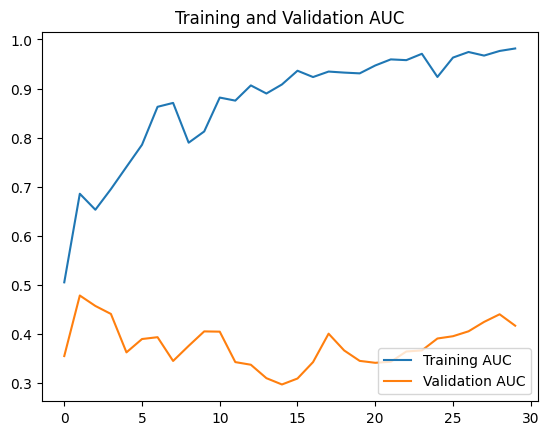

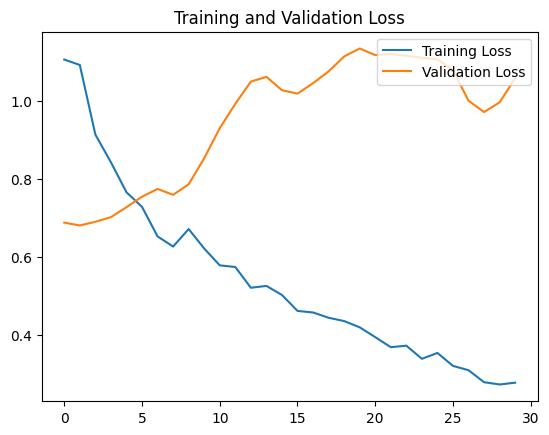

In [ ]:
# plot training
plot_training(cnn3_history)

In [ ]:
# compute final training evaluation metrics
cnn3_evaluation = cnn3.evaluate(x = X_val, y= y_val)

1/1 [==============================] - 1s 550ms/step - loss: 1.0592 - auc: 0.4173 - precision: 0.1000 - recall: 0.3500


### Model Comparison and Selection

In [ ]:
# Using append()
modeldict = {"cnn1": cnn1, "cnn2": cnn2, "cnn3": cnn3}
models = ["cnn1", "cnn2", "cnn3"]
results = pd.DataFrame()
for x in [cnn1_evaluation, cnn2_evaluation, cnn3_evaluation]:
  results = pd.concat([results, pd.Series(x)], axis=1)
results = results.transpose()
results.columns = ["Loss", "AUC", "Precision", "Recall"]
results["Model"] = models
results = results[["Model", "AUC", "Precision", "Recall"]]
results = results.sort_values(by="AUC", ascending=False)
best_model = results.iloc[0,0]
best_model = modeldict[best_model]

print(results)
best_model.evaluate(X_test_mfcc30s, y_test_mfcc30s)

  Model       AUC  Precision  Recall
0  cnn2  0.523214   0.000000    0.00
0  cnn1  0.508214   0.210526    0.20
0  cnn3  0.417321   0.100000    0.35
1/1 [==============================] - 2s 2s/step - loss: 1.2031 - auc: 0.5224 - precision: 0.0000e+00 - recall: 0.0000e+00


[1.2030953168869019, 0.5223978757858276, 0.0, 0.0]